In [34]:
#最初のセルに使用予定のライブラリを読み込ませておく
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [35]:
# pandasのread_tableというコマンドを使用し、'newID.tsv’という名前のファイルを、一列目に'#new_ID', 二列目に’BirthYear’というヘッダーをくっつけた形で読み込み、df_birthyear_headerという名前をつけといてください
df_birthyear_header = pd.read_table('newID.tsv', names = ('#new_ID', 'BirthYear'))
#df_birthyear_headerを表示してみてください
print(df_birthyear_header)

     #new_ID  BirthYear
0    a000474       1972
1    a000496       1964
2    a00049e       1987
3    a0004a7       1968
4    a0004e8       1982
5    a0004f9       1974
6    a00050a       1995
7    a00051b       1979
8    a00052c       1978
9    a00053d       1952
10   a00058e       1971
11   a000597       1974
12   a0005a8       1977
13   a0005be       1962
14   a0005c7       1987
15   a0005d8       1985
16   a0005e9       1960
17   a0005fa       1990
18   a00060b       1976
19   a00061c       1983
20   a00062d       1964
21   a00063e       1971
22   a00064f       1962
23   a000665       1960
24   a000676       1978
25   a00067e       1986
26   a000687       1983
27   a000698       1972
28   a0006b7       1961
29   a0006c8       1951
..       ...        ...
71   a0009dc       1989
72   a0009ed       1978
73   a0009fe       1975
74   a000a0f       1988
75   a000a20       1984
76   a000a31       1970
77   a000a42       1972
78   a000a53       1987
79   a000a58       1971
80   a000a69    

In [36]:
#各写真の性別ラベルデータ（.txt）読み込み
#newLabel.txtを読み込んでください
#これはもともといい具合のHeaderが付いているので特にnamesの指定は不要、後々オブジェクトとして扱う項目があるので、dtype=objectとしておいてください
df_sex=pd.read_table('newLabel.txt', dtype=object)
#df_sexを表示してみてください
print(def_sex)

      #new_ID Male0Female1
0     a000474            1
1     a000474            1
2     a000474            1
3     a000474            1
4     a000474            1
5     a000474            1
6     a000474            1
7     a000474            1
8     a000474            1
9     a000496            1
10    a000496            1
11    a000496            1
12    a000496            1
13    a000496            1
14    a000496            1
15    a000496            1
16    a000496            1
17    a000496            1
18    a000496            1
19    a000496            1
20    a000496            1
21    a000496            1
22    a00049e            0
23    a00049e            0
24    a00049e            0
25    a00049e            0
26    a00049e            0
27    a00049e            0
28    a00049e            0
29    a00049e            0
...       ...          ...
1129  a000b91            0
1130  a000b91            0
1131  a000b91            0
1132  a000b91            0
1133  a000ba2            0
1

In [27]:
#df_sexは写真ごとのデータ。個人IDごとのデータが残るように、重複を除去する必要がある。
# 一個人の複数の写真に付いてラベルがくっついているので、個人の性別情報のみにまとめられるよう重複を除去する
df_sex_drop=df_sex.drop_duplicates()
print(df_sex_drop)

      #new_ID Male0Female1
0     a000474            1
9     a000496            1
22    a00049e            0
32    a0004a7            1
50    a0004e8            0
64    a0004f9            0
73    a00050a            1
78    a00051b            1
85    a00052c            1
96    a00053d            0
104   a00058e            0
113   a000597            0
128   a0005a8            0
135   a0005be            1
148   a0005c7            1
156   a0005d8            1
171   a0005e9            0
181   a0005fa            0
193   a00060b            0
202   a00061c            1
212   a00062d            0
222   a00063e            1
239   a00064f            1
249   a000665            1
258   a000676            0
275   a00067e            0
286   a000687            0
301   a000698            1
317   a0006b7            1
327   a0006c8            1
...       ...          ...
810   a0009dc            0
828   a0009ed            0
843   a0009fe            1
857   a000a0f            1
864   a000a20            0
8

In [29]:
#　生年情報と性別情報を結合
df_merged=pd.merge(df_birthyear_header, df_sex_drop, on='#new_ID', how='inner')
print(df_merged)

    #new_ID  BirthYear Male0Female1
0   a000474       1972            1
1   a000496       1964            1
2   a00049e       1987            0
3   a0004a7       1968            1
4   a0004e8       1982            0
5   a0004f9       1974            0
6   a00050a       1995            1
7   a00051b       1979            1
8   a00052c       1978            1
9   a00053d       1952            0
10  a00058e       1971            0
11  a000597       1974            0
12  a0005a8       1977            0
13  a0005be       1962            1
14  a0005c7       1987            1
15  a0005d8       1985            1
16  a0005e9       1960            0
17  a0005fa       1990            0
18  a00060b       1976            0
19  a00061c       1983            1
20  a00062d       1964            0
21  a00063e       1971            1
22  a00064f       1962            1
23  a000665       1960            1
24  a000676       1978            0
25  a00067e       1986            0
26  a000687       1983      

In [30]:
#結合したファイルのbirth_yearから2019年現在の年齢を算出し、新しい列に書き加える
df_merged['Age'] = 2019-df_merged['BirthYear'] 
print(df_merged)

    #new_ID  BirthYear Male0Female1  Age
0   a000474       1972            1   47
1   a000496       1964            1   55
2   a00049e       1987            0   32
3   a0004a7       1968            1   51
4   a0004e8       1982            0   37
5   a0004f9       1974            0   45
6   a00050a       1995            1   24
7   a00051b       1979            1   40
8   a00052c       1978            1   41
9   a00053d       1952            0   67
10  a00058e       1971            0   48
11  a000597       1974            0   45
12  a0005a8       1977            0   42
13  a0005be       1962            1   57
14  a0005c7       1987            1   32
15  a0005d8       1985            1   34
16  a0005e9       1960            0   59
17  a0005fa       1990            0   29
18  a00060b       1976            0   43
19  a00061c       1983            1   36
20  a00062d       1964            0   55
21  a00063e       1971            1   48
22  a00064f       1962            1   57
23  a000665     

In [31]:
#MaleとFemaleでグルーピングし、記述統計量を求める
grouped_by_MF = df_merged.groupby('Male0Female1')
print(grouped_by_MF)
print(grouped_by_MF.size())  #男性５１名、女性４９名


Male0Female1
0    51
1    49
dtype: int64


In [32]:
#MaleとFemaleの年齢をMann-Whitney検定で比較する
female_age = df_merged[df_merged['Male0Female1'] == '1']['Age']
male_age = df_merged[df_merged['Male0Female1'] == '0']['Age']
stats.mannwhitneyu(female_age,male_age, alternative='two-sided')

MannwhitneyuResult(statistic=1302.0, pvalue=0.7197421527240484)

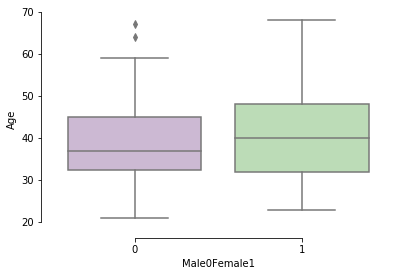

In [33]:
#boxplotを作図
sns.boxplot(x='Male0Female1', y="Age", data=df_merged, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('figure_boxplot.png') 